In [8]:
import networkx as nx
import numpy as np
import math

In [171]:
n10 = nx.barabasi_albert_graph(10, 3)
n100 = nx.barabasi_albert_graph(100, 3)
n1000 = nx.barabasi_albert_graph(1000, 3)
n10000 = nx.barabasi_albert_graph(10000, 3)

In [10]:
def write_edgelist(G, name):
    with open('../random_networks/'+name+'.edgelist', 'w') as handle: 
        for e in G.edges():
            handle.write(str(e[0]) + ' ' + str(e[1]) + '\n')

In [173]:
write_edgelist(n10,'n10')
write_edgelist(n100,'n100')
write_edgelist(n1000,'n1000')
write_edgelist(n10000,'n10000')


In [11]:
#genenating random train with log(n) samples
import random
def gen_train(g, name):
    len_graph = len(g.nodes())
    n = min(3*len_graph/4,2*int(math.pow(math.log(len(g.nodes()), 2),2)))
    nodes = list(g.nodes())
    np.random.shuffle(nodes)
    nodes = nodes[:n]
    c = np.random.choice([0,1], n)
    with open('../random_networks/'+name+'.train', 'w') as handle: 
        for e in zip(nodes,c):
            handle.write(str(e[0]) + ' ' + str(e[1]) + '\n')

In [175]:
gen_train(n10,'n10')
gen_train(n100,'n100')
gen_train(n1000,'n1000')
gen_train(n10000,'n10000')

In [177]:
n100000 = nx.barabasi_albert_graph(100000, 3)
write_edgelist(n100000,'n100000')
gen_train(n100000,'n100000')

In [ ]:
#generating random for multiples m

n100000 = nx.barabasi_albert_graph(1000, 200)
write_edgelist(n100000,'n1000_200')
gen_train(n100000,'n1000_200')

In [168]:
#tempos de execução
ns = [100, 1000, 10000, 100000]
ts = [4, 54, 1020, 13260]
xs = np.log(ns) / np.log(10)
ys = np.log(ts) / np.log(10) + 0.39794001 + 1 #pra comparação com leis de potência

In [171]:
ey = np.array(xs) 
ey15 = np.array(xs*1.5) -1
ey2 = np.array(xs*2) -2


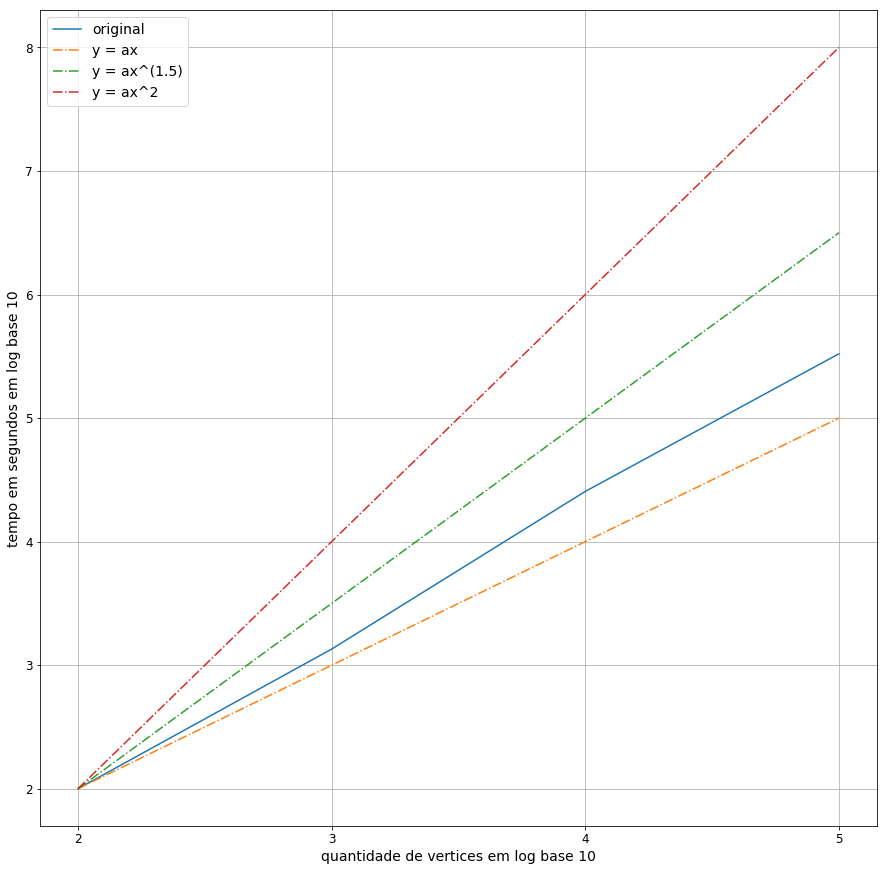

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.tick_params(labelsize=12)
plt.xlabel('quantidade de vertices em log base 10', fontsize=14)
plt.ylabel('tempo em segundos em log base 10', fontsize=14)
plt.plot(xs,ys, label='original')
plt.plot(xs,ey, linestyle='-.', label = 'y = ax')
plt.plot(xs,ey15, linestyle='-.', label = 'y = ax^(1.5)')
plt.plot(xs,ey2, linestyle='-.', label = 'y = ax^2')
plt.xticks(xs)
#plt.yticks([2,3,4,5,6,7,8,9,10, 11])
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [283]:
#tempos de execução
ms = [20, 60, 120, 200]
ts = [180, 272, 304, 347]
xs = np.log(ms) / np.log(10)
ys = np.log(ts) / np.log(10) + 0 #pra comparação com leis de potência

In [337]:
ey = np.array(xs)
ey15 = np.array(xs*1.5) 
ey2 = np.array(xs*2) - [ey2[0] - ey[0]]

In [338]:
ey = ey - [ey[0] - ys[0]]
ey15 = ey15 - [ey15[0] - ys[0]]
ey2 = ey2 - [ey2[0] - ys[0]]

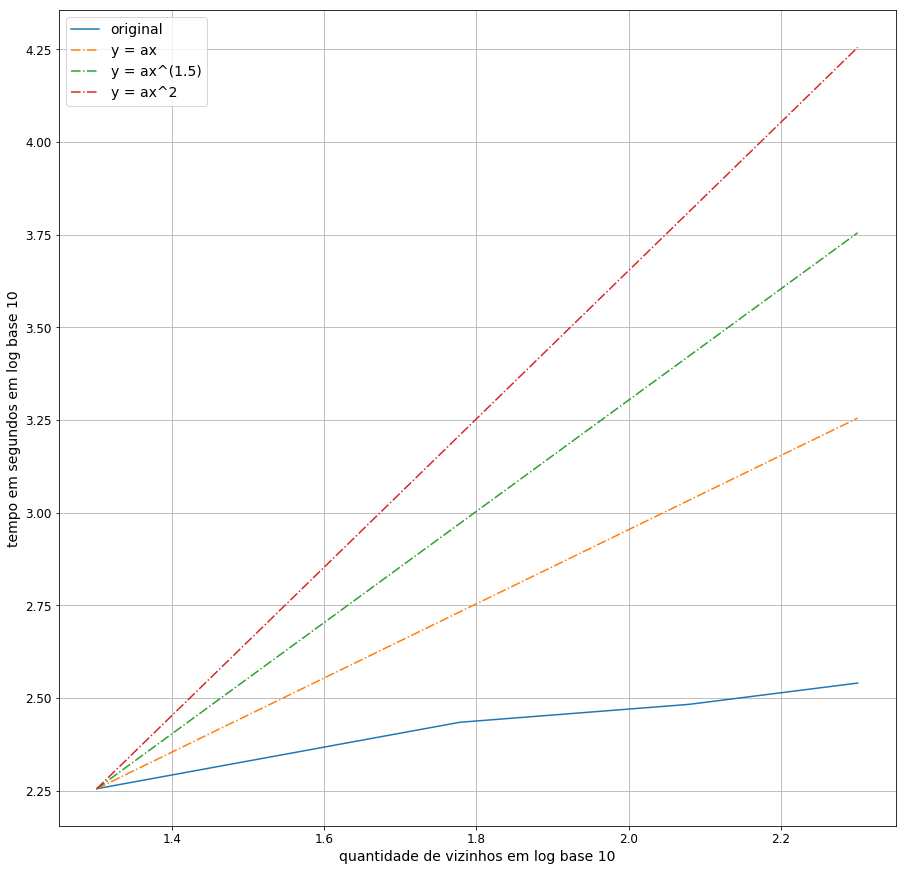

In [341]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.tick_params(labelsize=12)
plt.xlabel('quantidade de vizinhos em log base 10', fontsize=14)
plt.ylabel('tempo em segundos em log base 10', fontsize=14)
plt.plot(xs,ys, label='original')
plt.plot(xs,ey, linestyle='-.', label = 'y = ax')
plt.plot(xs,ey15, linestyle='-.', label = 'y = ax^(1.5)')
plt.plot(xs,ey2, linestyle='-.', label = 'y = ax^2')
#plt.xticks([1,2,3,4])
#plt.yticks([1,2,3,4])
plt.legend(fontsize=14)
plt.grid()
plt.show()